# Datos de Mercado de Valores

## Advanced Micro Devices, Inc. (AMD)

Esta base de datos tiene su raiz del siguiente link:

https://es.finance.yahoo.com/quote/AMD/history?p=AMD

El Data CSV se tomara del siguiente GitHub:

https://github.com/OnRuiso/Deep-Learning-/blob/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/AMD.csv

En formato RAW:

https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/AMD.csv

La Informasion presentada en el dataset esta delimitada en las fechas del **29/12/1997 al 25/09/2021**

La data (CSV) tiene las siguientes columnas: Fecha - en formato: yy-mm-dd

*   OPEN-Abierto - precio de la acción en el mercado abierto (estos son datos de NYSE, así que todo en USD)
*   HIGH - Alto - Precio más alto alcanzado en el día
*   Low Close - Precio más bajo alcanzado en el día
*   Volumen - Número de acciones negociadas   
*   nombre: el nombre del ticker de la acción

### Instalado Librerias

In [ ]:
!pip install fsspec # Necesitamos la libreria FSSPEC (Interfaces de sistema de archivos para Python)
!pip install beautifulsoup4  # Necesitamos la libreria  beautifulsoup4 : para raspado web altamente evolucionadas

### Importar Librerias

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D

import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

### Importacion de Dataset

In [ ]:
df_amd = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/AMD.csv")

### Info. Dataset

#### Informacion General del Dataset

df.info() : Devuelve información (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) sobre el DataFrame df.

In [ ]:
df_amd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5975 non-null   object 
 1   Open       5975 non-null   float64
 2   High       5975 non-null   float64
 3   Low        5975 non-null   float64
 4   Close      5975 non-null   float64
 5   Adj Close  5975 non-null   float64
 6   Volume     5975 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 326.9+ KB


#### Numero de filas y columnas

df.shape : Devuelve una tupla con el número de filas y columnas del DataFrame df.

In [ ]:
df_amd.shape

(5975, 7)

#### Numero de Elementos

df.size : Devuelve el número de elementos del DataFrame."""

In [ ]:
df_amd.size

41825

#### Nombre de *Columnas*

df.columns : Devuelve una lista con los nombres de las columnas del DataFrame df.

In [ ]:
df_amd.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

#### Nombre de Filas

df.index : Devuelve una lista con los nombres de las filas del DataFrame df.

In [ ]:
df_amd.index

RangeIndex(start=0, stop=5975, step=1)

#### Devueve N primeras filas del Dataset

df.head(n) : Devuelve las n primeras filas del DataFrame df

In [ ]:
df_amd.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-12-29,8.84375,8.96875,8.5625,8.6875,8.6875,2806200
1,1997-12-30,8.68750,8.78125,8.5625,8.5625,8.5625,3097000
2,1997-12-31,8.68750,9.09375,8.6250,8.8750,8.8750,6449200


#### Devuelve N ultimas filas del Dataset

df.tail(n) : Devuelve las n últimas filas del DataFrame df.

In [ ]:
df_amd.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
5972,2021-09-22,102.820000,104.559998,102.209999,104.379997,104.379997,34126300
5973,2021-09-23,104.889999,106.860001,103.889999,106.150002,106.150002,32816700
5974,2021-09-24,105.190002,106.050003,104.680000,105.800003,105.800003,26464600


#### Titulos y tipo de las columnas

print(df.keys()) : Imprime los keys o titulos de las columnas, funciona como columns

In [ ]:
print(df_amd.keys())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


#### Cuenta nulos por columna

"df.isnull().sum() = nos dice si hay datos nulos y va sumando cuantos encuentra en cada columna"

In [ ]:
df_amd.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### Numero de elementos por columna

df.count() : Devuelve una serie número de elementos que no son nulos ni NaN en cada columna del DataFrame df.

In [ ]:
df_amd.count()

Date         5975
Open         5975
High         5975
Low          5975
Close        5975
Adj Close    5975
Volume       5975
dtype: int64

#### Conteo de datos segun tipo

df.sum() : Devuelve una serie con la suma de los datos de las columnas del 
DataFrame df cuando los datos son de un tipo numérico, o la concatenación de 
ellos cuando son del tipo cadena str.

In [ ]:
df_amd.sum()

Date         1997-12-291997-12-301997-12-311998-01-021998-0...
Open                                                    101195
High                                                    103365
Low                                                    98876.8
Close                                                   101136
Adj Close                                               101136
Volume                                            159808434700
dtype: object

#### Menores datos del Dataset

df.min() : Devuelve una serie con los menores de los datos de las columnas del DataFrame df.

In [ ]:
df_amd.min()

Date         1997-12-29
Open               1.62
High               1.69
Low                1.61
Close              1.62
Adj Close          1.62
Volume                0
dtype: object

#### Mayores datos del Dataset

df.max() : Devuelve una serie con los mayores de los datos de las columnas del DataFrame df.

In [ ]:
df_amd.max()

Date         2021-09-24
Open             116.63
High             122.49
Low              114.16
Close            118.77
Adj Close        118.77
Volume        325058400
dtype: object

#### Media de los datos por columna

df.mean() : Devuelve una serie con las media de los datos de las columnas del DataFrame df cuando los datos son de un tipo numérico.

In [ ]:
df_amd.mean()

Open         1.693645e+01
High         1.729962e+01
Low          1.654841e+01
Close        1.692651e+01
Adj Close    1.692651e+01
Volume       2.674618e+07
dtype: float64

#### Deviacion tipica de los datos por columna

df.std() : Devuelve una serie con las desviaciones típicas de los datos de las columnas del DataFrame df cuando los datos son de un tipo numérico.

In [ ]:
df_amd.std()

Open         1.944680e+01
High         1.979739e+01
Low          1.907264e+01
Close        1.944822e+01
Adj Close    1.944822e+01
Volume       2.884542e+07
dtype: float64

#### Descripcion estadistica por tipo de dato

df.describe(include = tipo) : Devuelve un DataFrame con un resumen estadístico de las columnas del 
DataFrame df del tipo tipo. Para los datos numéricos (number) se calcula la media, la desviación típica, 
el mínimo, el máximo y los cuartiles de las columnas numéricas. Para los datos no numéricos (object) 
se calcula el número de valores, el número de valores distintos, la moda y su frecuencia. Si no se indica 
el tipo solo se consideran las columnas numéricas.

In [ ]:
df_amd.describe(include = int)

,Volume
count,5.975000e+03
mean,2.674618e+07
std,2.884542e+07
min,0.000000e+00
25%,8.708200e+06
50%,1.669430e+07
75%,3.391720e+07
max,3.250584e+08


#### Numero de veces que se repite un dato

s.value_counts() : Devuelve una serie con la frecuencia (número de repeticiones) de cada valor de la serie s.

In [ ]:
df_amd.value_counts() 

Date        Open        High        Low         Close       Adj Close   Volume  
2021-09-24  105.190002  106.050003  104.680000  105.800003  105.800003  26464600    1
2005-11-30  25.350000   26.350000   25.299999   26.180000   26.180000   8302400     1
2005-11-16  25.209999   25.799999   25.200001   25.549999   25.549999   10696100    1
2005-11-17  25.770000   26.000000   25.430000   25.889999   25.889999   6618300     1
2005-11-18  26.250000   26.950001   26.250000   26.740000   26.740000   16000200    1
                                                                                   ..
2013-10-30  3.350000    3.360000    3.300000    3.300000    3.300000    16208000    1
2013-10-31  3.310000    3.350000    3.250000    3.340000    3.340000    18062700    1
2013-11-01  3.370000    3.370000    3.300000    3.310000    3.310000    14422000    1
2013-11-04  3.340000    3.380000    3.290000    3.320000    3.320000    16749400    1
1997-12-29  8.843750    8.968750    8.562500    8.687500   

#### Descripcion general del Dataset

s.describe(): Devuelve una serie con un resumen descriptivo que incluye el 
número de datos, su suma, el mínimo, el máximo, la media, la desviación típica y los cuartiles.

In [ ]:
df_amd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5.975000e+03
mean,16.936451,17.299620,16.548410,16.926509,16.926509,2.674618e+07
std,19.446798,19.797394,19.072641,19.448222,19.448222,2.884542e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,5.825000,5.995000,5.700000,5.830000,5.830000,8.708200e+06
50%,10.380000,10.660000,10.062500,10.360000,10.360000,1.669430e+07
75%,19.655000,20.153125,19.095000,19.637500,19.637500,3.391720e+07
max,116.629997,122.489998,114.160004,118.769997,118.769997,3.250584e+08


#### Tipos de datos de las columnas

df.dtypes : Devuelve una serie con los tipos de datos de las columnas del DataFrame df.

In [ ]:
df_amd.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Convertir tipo OBJECT como DATE

La conversion de este tipo de dato en el dataframe es necesaria de realizar, esto debido a que para poder operar con la fechas como se hara mas adelante, se necita que los valores de las fechas esten en DATE no que se esten leyendo como tipo OBJECT.

In [ ]:
# en la columna 'date' de df_amd sera igual (=), 
#a la convercion valor de tiempo utilizando la liberia pandas (pd.to_datetime) 
#de lo que se encuentre en la columna 'date' del dataset df_amd

df_amd['Date'] = pd.to_datetime( df_amd['Date'] ) 

In [ ]:
# confirmamos la conversion
df_amd.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
# Observamos nuevamente la informacion del Dataset
df_amd.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-12-29,8.84375,8.96875,8.5625,8.6875,8.6875,2806200
1,1997-12-30,8.68750,8.78125,8.5625,8.5625,8.5625,3097000
2,1997-12-31,8.68750,9.09375,8.6250,8.8750,8.8750,6449200


### SobreEscribir Dataframe

Esta sobre Escritura del data frame lo haremos con los datos que nos intereza, descartando los datos que no son de nuestro interes. Solo nos quedaremos con las columnas de Date y Close.

In [ ]:
  #nota: puedo sobreescribirla o crear otra con los datos que me interezan
  df_amd = df_amd[['Date', 'Close']]

In [ ]:
#confirmamos los nuevos datos
df_amd.head(2)

,Date,Close
0,1997-12-29,8.6875
1,1997-12-30,8.5625


In [ ]:
df_amd.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [ ]:
#confirmamos que no se haya generado o colado algun nulo extraño
df_amd.isnull().sum()

Date     0
Close    0
dtype: int64

In [ ]:
#Observamos el tamaño que tienen los datos ahora
df_amd.shape

(5975, 2)

### Pivotar el Datframe

colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda

In [ ]:
# Insertamos una nueva columna al final que tenga el simbolo de amd
df_amd['symbol']='AMD'
df_amd.head(4)

,Date,Close,symbol
0,1997-12-29,8.68750,AMD
1,1997-12-30,8.56250,AMD
2,1997-12-31,8.87500,AMD
3,1998-01-02,9.65625,AMD


In [ ]:
#colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda
df_amd = df_amd.pivot(index='Date', columns='symbol', values='Close')
df_amd = df_amd.dropna(axis=1)    #borramos filas vacias
df_amd.head(4)

symbol,AMD
Date,
1997-12-29,8.68750
1997-12-30,8.56250
1997-12-31,8.87500
1998-01-02,9.65625


### Normalizacion de Datos

Podemos ver los datos en el espacio de tiempo que querramos:

*  W - para datos semanales
*  M - para datos mensuales
*  Q - para el trimestre
*  A - por año

In [ ]:
# Reescribimos la base de datos utilizando el date dado en semanas (W)
df_amd = df_amd.resample('W').last()
df_amd.head(4)

symbol,AMD
Date,
1998-01-04,9.65625
1998-01-11,9.12500
1998-01-18,8.90625
1998-01-25,9.06250


### Graficando Datos

In [ ]:
#funcion para sacar el  nombre de las empresas segun  su sigla
def get_name(symbol):
    name = symbol
    try:
        name= df_amd.loc[df_amd['symbol'] == symbol]['Security'].values[0]
    except:
        name='No tiene nombre el simbolo'
    return name

def plot_stock(symbol, df_amd=df_amd):
    name = str(get_name(symbol))
    df_amd[symbol].plot(title=name, label=name, alpha=0.9);

#### Valor de Cierre de las acciones

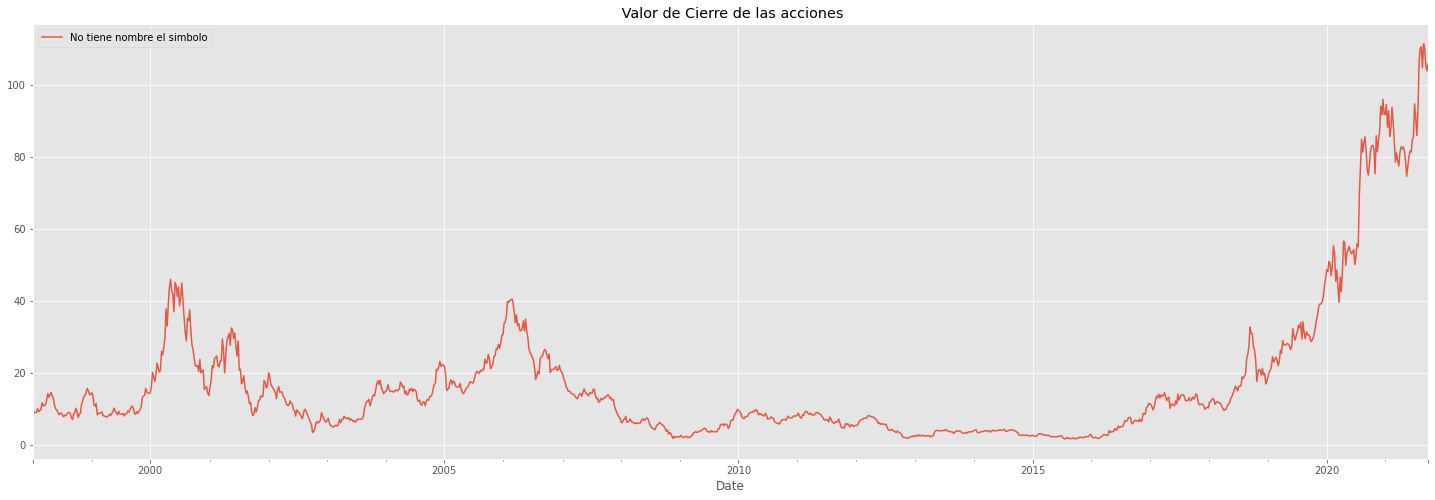

In [ ]:
plt.figure(figsize = (25,8))
plot_stock('AMD')
plt.title('Valor de Cierre de las acciones')
plt.legend();

#### Ganancias de las acciones

Calcularemos la devolución desde el primer día de la compra. Por lo tanto, el rendimiento de un día determinado es cuánto se ganaría (o perdería), en porcentaje, si las acciones se vendieran en este día (los costos de transacción no se consideran)

In [ ]:
df_amd.head()

symbol,AMD
Date,
1998-01-04,9.65625
1998-01-11,9.12500
1998-01-18,8.90625
1998-01-25,9.06250
1998-02-01,10.09375


In [ ]:
start = df_amd.iloc[0]  #traemos la primera fila y la volvemos un vector

In [ ]:
#calculamos el valor del retorno de la acción
returns = (df_amd - start) / start
returns.head(3)

symbol,AMD
Date,
1998-01-04,0.000000
1998-01-11,-0.055016
1998-01-18,-0.077670


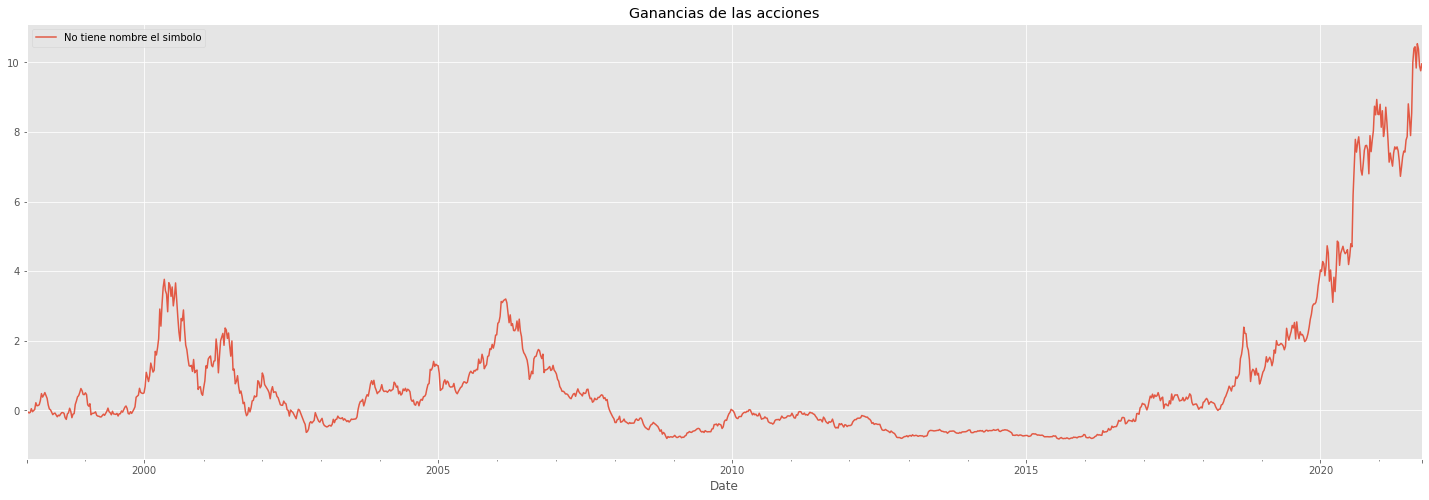

In [ ]:
plt.figure(figsize = (25,8))
plot_stock('AMD', df_amd=returns)
plt.title('Ganancias de las acciones')
plt.legend();

#### Cierre de las acciones VS Ganancias de las acciones

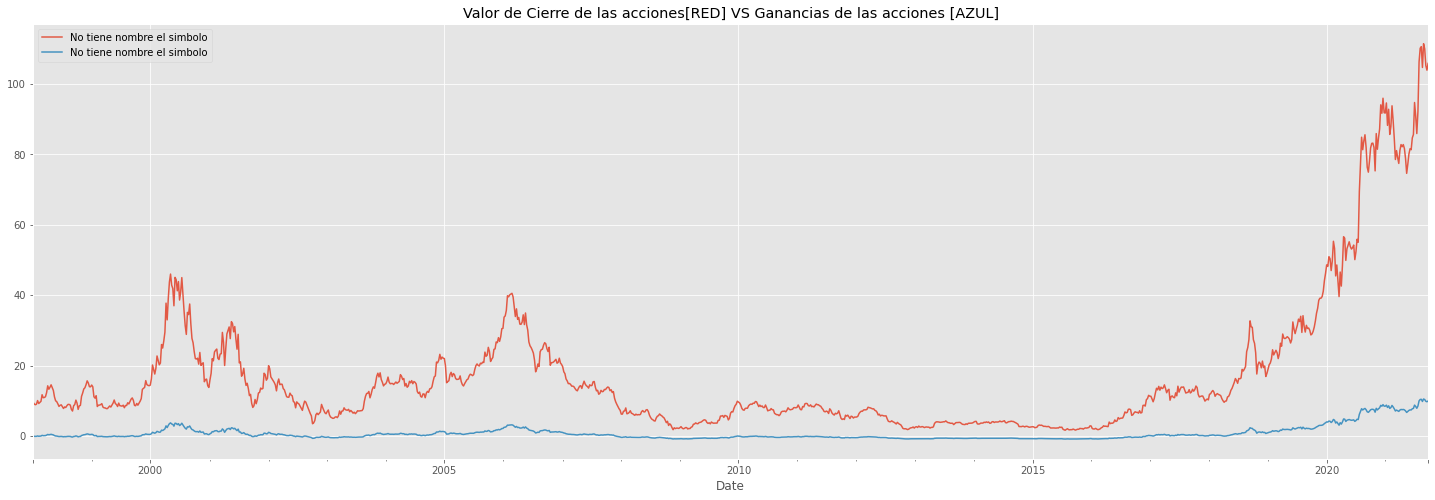

In [ ]:
plt.figure(figsize = (25,8))
plot_stock('AMD')
plot_stock('AMD', df_amd=returns)
plt.title('Valor de Cierre de las acciones[RED] VS Ganancias de las acciones [AZUL]')
plt.legend();

### Analisis por Kmeans

#### Re-importamos el DataSet

In [ ]:
df_amd = pd.read_csv("https://raw.githubusercontent.com/OnRuiso/Deep-Learning-/main/Codigos/Deep_Learnig_IA_Data/DataSets_P1T10/AMD.csv")

In [ ]:
df_amd.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-12-29,8.84375,8.96875,8.5625,8.6875,8.6875,2806200


In [ ]:
df_amd.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df_amd['Date'] = pd.to_datetime( df_amd['Date'] )

In [ ]:
df_amd.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

#### Graficando el histograma de los datos


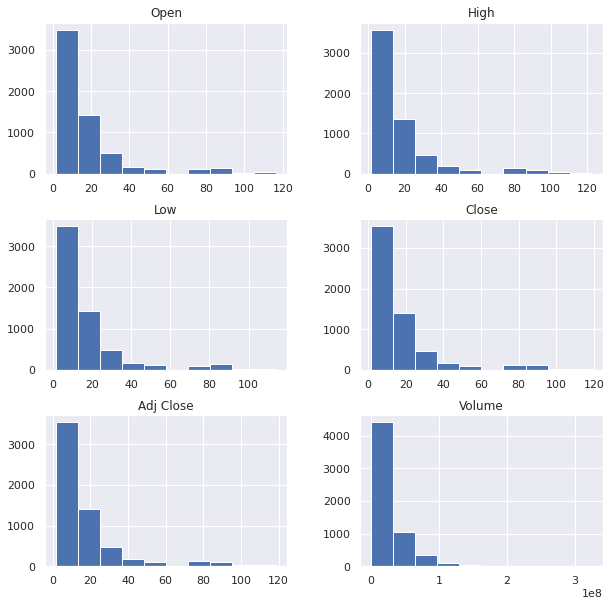

In [ ]:
df_amd.drop(['Date'],1).hist()
plt.show()

#### Graficando cada dato en el tiempo

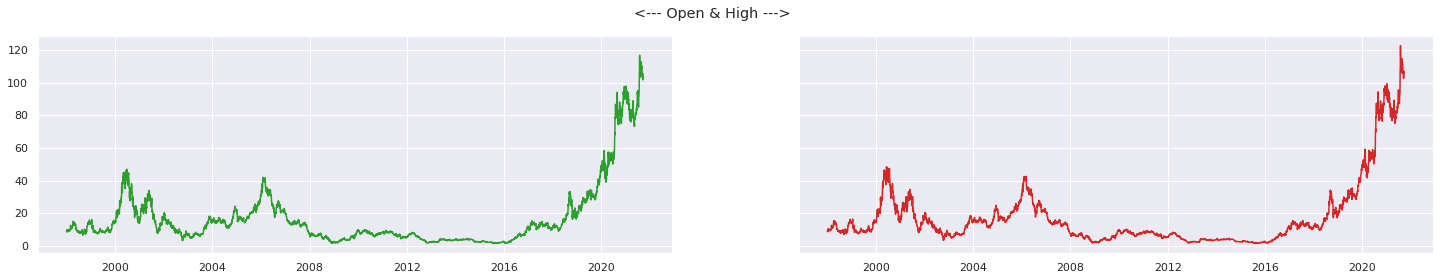

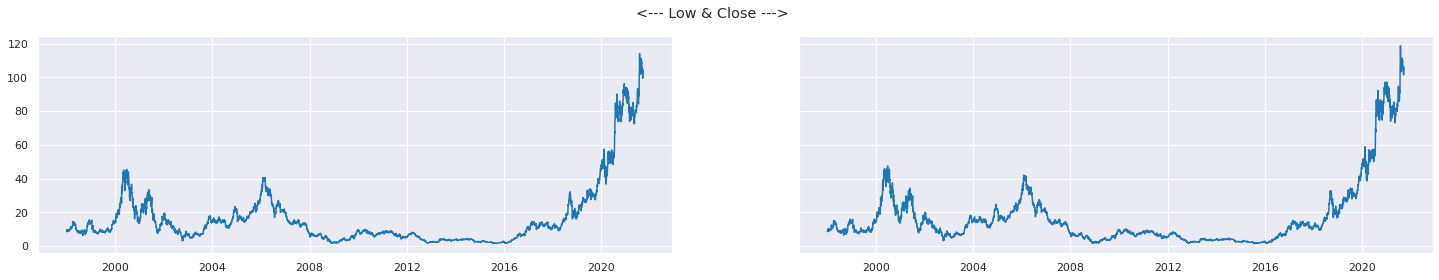

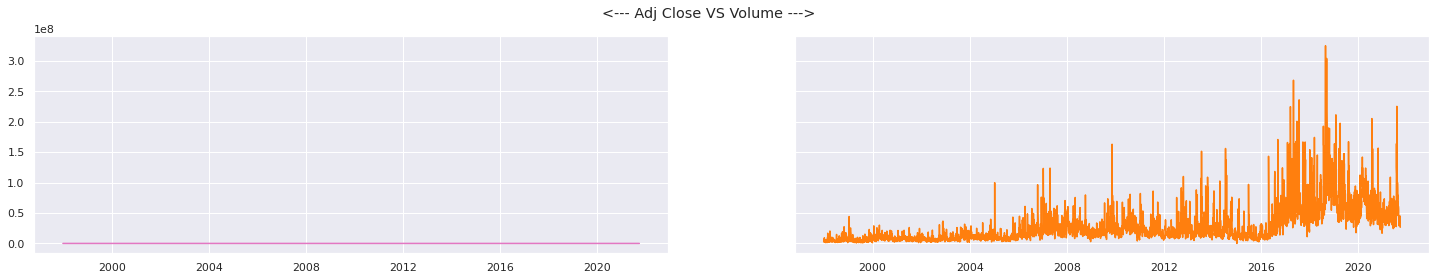

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(25, 4), sharey=True)
plt.suptitle('<--- Open & High --->')
axs[0].plot(df_amd['Date'], df_amd['Open'], color='tab:green')
axs[1].plot(df_amd['Date'], df_amd['High'], color='tab:red')

fig, axs = plt.subplots(1, 2, figsize=(25, 4), sharey=True)
plt.suptitle('<--- Low & Close --->')
axs[0].plot(df_amd['Date'], df_amd['Low'], color='tab:blue')
axs[1].plot(df_amd['Date'], df_amd['Close'], color='tab:blue')

fig, axs = plt.subplots(1, 2, figsize=(25, 4), sharey=True)
plt.suptitle('<--- Adj Close VS Volume --->')
axs[0].plot(df_amd['Date'], df_amd['Adj Close'], color='tab:pink')
axs[1].plot(df_amd['Date'], df_amd['Volume'], color='tab:orange')

#df_amd.drop(['Date'],1).plot()

#### Buscando Correlacion de datos

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


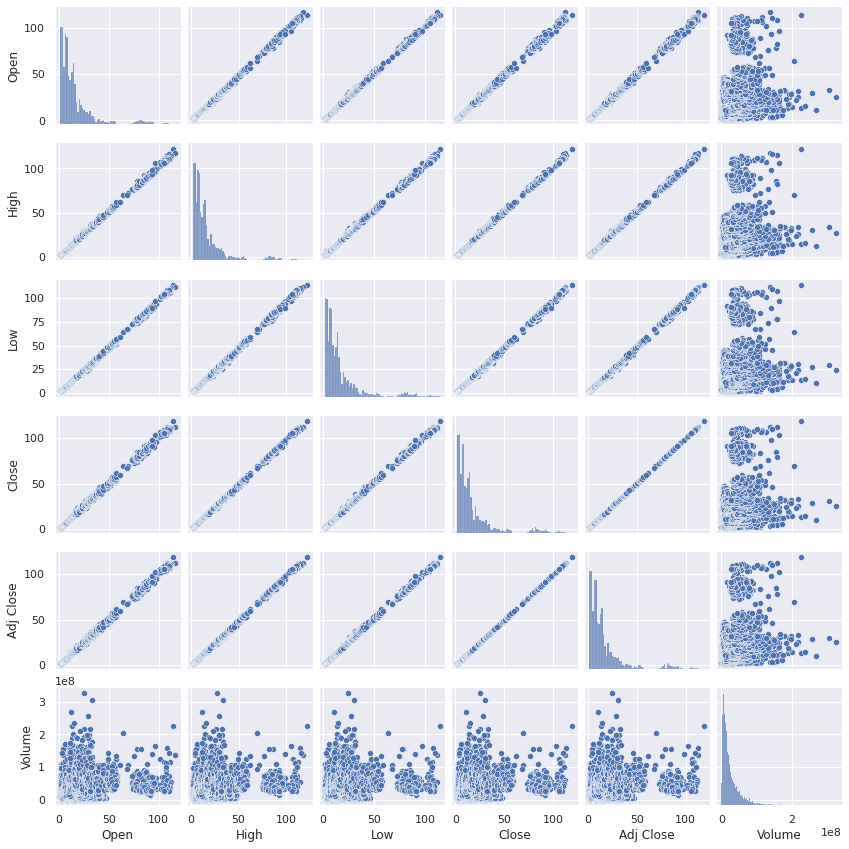

In [ ]:
sb.pairplot(df_amd,size=2,vars=["Open","High","Low","Close","Adj Close", "Volume"],kind='scatter')

#### Reescribir la base de datos

Como podemos ver en el anterior grafico, la gran mayoria de datos puede predecirse por regrecion lineal u otros metodos de prediccion de resultados, salvo las que se meten con Volume, por lo que se asume que estas generan ruido en la informacion, por lo que se resuelve quitar Volume y Adj Close del DataFrame.

In [ ]:
df_amd.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df_amd = df_amd[['Date','Open','High','Low','Close']]

In [ ]:
df_amd.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

#### Crear nueva "Categoria"

In [ ]:
"""
#HELP, para crear una "categoria" llamada fechas

import pandas as pd
import numpy as np
import datetime

list_of_dates = ['2019-11-20', '2020-01-02', '2020-02-05','2020-03-10','2020-04-16']
employees=['Hisila', 'Shristi','Zeppy','Alina','Jerry']
df = pd.DataFrame({'Joined date': pd.to_datetime(list_of_dates)},index=employees)

df['Year'] = df['Joined date'].dt.year 
df['Month'] = df['Joined date'].dt.month 
print(df)
"""

'\n#HELP, para crear una "categoria" llamada fechas\n\nimport pandas as pd\nimport numpy as np\nimport datetime\n\nlist_of_dates = [\'2019-11-20\', \'2020-01-02\', \'2020-02-05\',\'2020-03-10\',\'2020-04-16\']\nemployees=[\'Hisila\', \'Shristi\',\'Zeppy\',\'Alina\',\'Jerry\']\ndf = pd.DataFrame({\'Joined date\': pd.to_datetime(list_of_dates)},index=employees)\n\ndf[\'Year\'] = df[\'Joined date\'].dt.year \ndf[\'Month\'] = df[\'Joined date\'].dt.month \nprint(df)\n'

In [ ]:
# probando que si debuelva la fecha
fecha = df_amd['Date'].head(1)
print(fecha.dt.year)

0    1997
Name: Date, dtype: int64


In [ ]:
df_amd['categoria']=df_amd['Date'].dt.year
df_amd.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,categoria
0,1997-12-29,8.84375,8.96875,8.5625,8.6875,1997
1,1997-12-30,8.68750,8.78125,8.5625,8.5625,1997
2,1997-12-31,8.68750,9.09375,8.6250,8.8750,1997


In [ ]:
df_amd['usuario']='AMD'
df_amd.head(3)

,Date,Open,High,Low,Close,categoria,usuario
0,1997-12-29,8.84375,8.96875,8.5625,8.6875,1997,AMD
1,1997-12-30,8.68750,8.78125,8.5625,8.5625,1997,AMD
2,1997-12-31,8.68750,9.09375,8.6250,8.8750,1997,AMD


In [ ]:
df_amd.dtypes 

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
categoria             int64
usuario              object
dtype: object

#### Nueva Correlacion

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


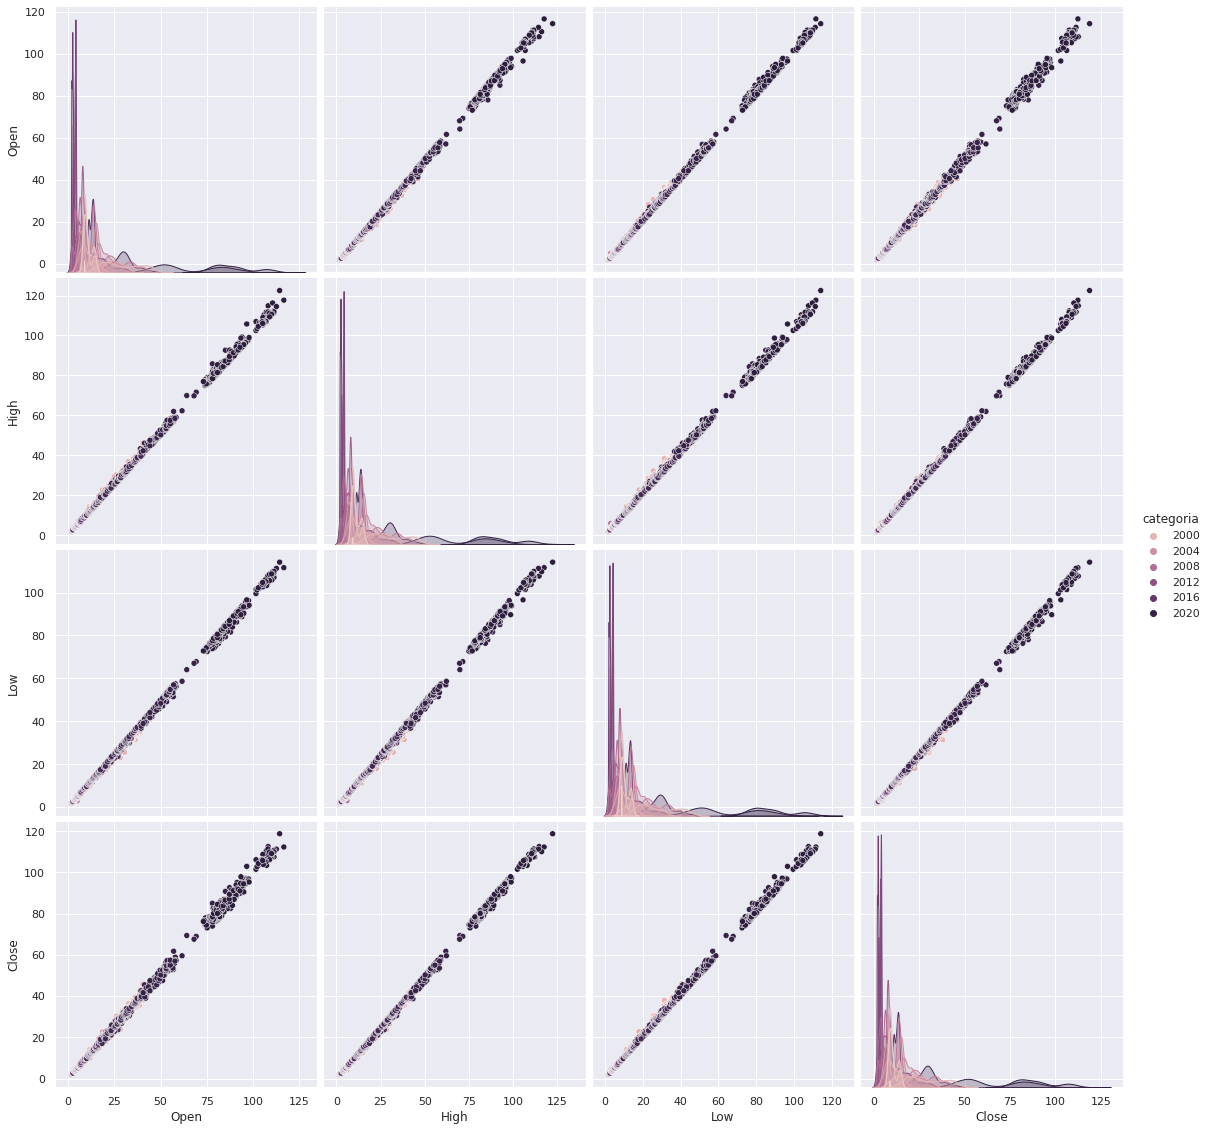

In [ ]:
sb.pairplot(df_amd,hue='categoria', size=4,vars=["Open","High","Low","Close"],kind='scatter')

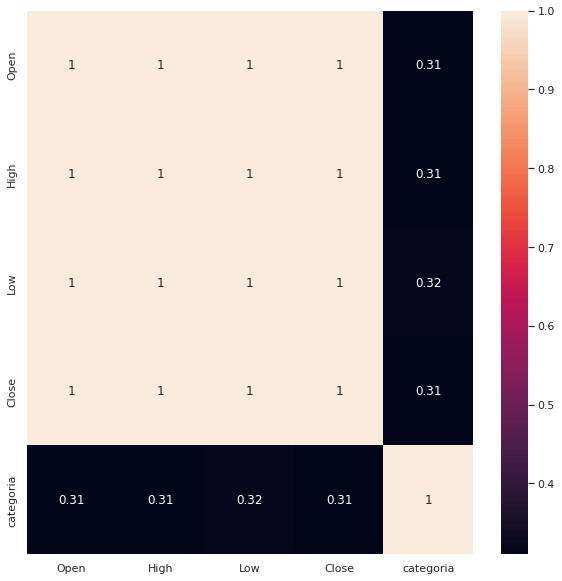

In [ ]:
sb.set(rc={'figure.figsize':(10.0,10.0)}) #El tamaño de esta figura
#función de correlación de pandas (cercano a 1 es la mejor correlación, negativos la peor)
correlation_matrix = df_amd.corr().round(2)
# annot = True (para imprimir los valores dentro del cuadrado)
sb.heatmap(data=correlation_matrix, annot=True)

### Grupos de datos

En cada uno de los datos podemos aplicar un modelo de prediccion de datos como la regresion lineal

#### Separacion de datos



In [ ]:
#X = np.array(df_amd[["Open","High","Low","Close"]])
X = np.array(df_amd[["Close"]])
y = np.array(df_amd['categoria'])
#forma de la matriz
X.shape

(5975, 1)

#### Encontrar Clousters

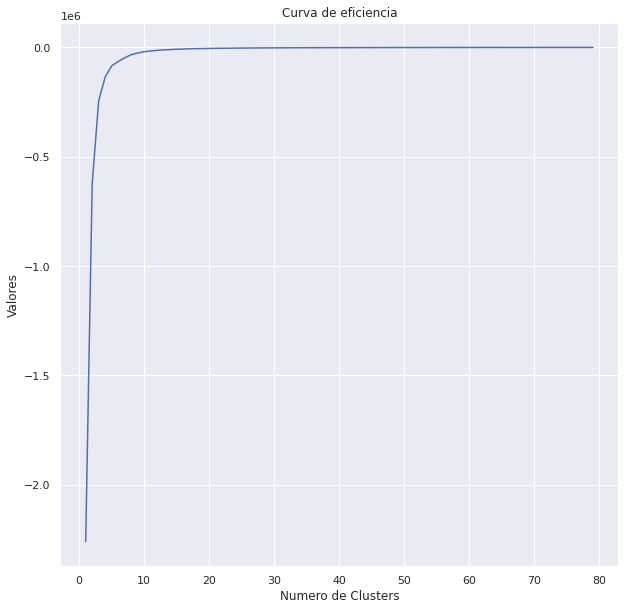

In [ ]:
"""
En este , el numero de clousters indicado para tratar la base de datos es aquel 
que se encuentra en la curva grafica generada, un codo. el mismo corresponde al 
valor medio del mismo de manera grafica o al dado segun por interpretacion visual
en toda la curva representada.
"""
Nc = range(1, 80)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

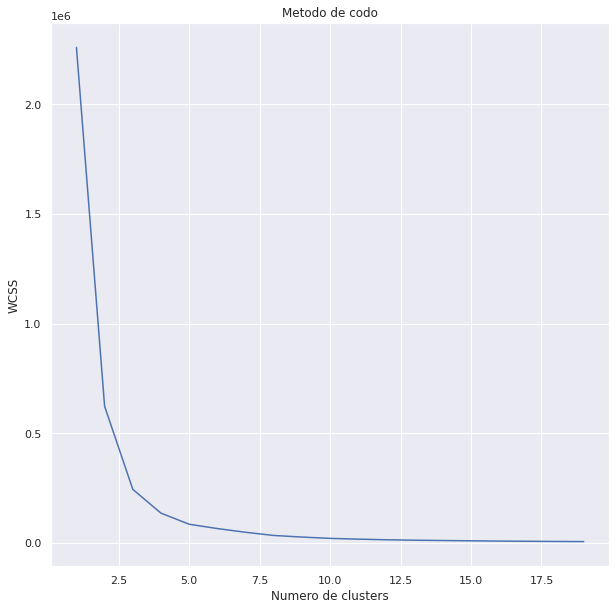

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

#### Ubicar centroides

In [ ]:
# valor de los centroides
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 5.70873825]
 [87.36709463]
 [27.46740373]
 [46.37733305]
 [14.81402602]]


In [ ]:
labels = kmeans.predict(X)

#### Tablas

In [ ]:
copy =  pd.DataFrame()
copy['usuario']=df_amd['usuario'].values
copy['categoria']=df_amd['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,2971.0
1,red,296.0
2,green,758.0
3,blue,277.0
4,cyan,1673.0
5,yellow,NaN
6,orange,NaN
7,black,NaN
8,pink,NaN


In [ ]:
# Datos similares entre ellos, arrojaria que pre
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_amd.index.values
df_cluster['data_index']= df_amd.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,AMD,0
1,AMD,0
2,AMD,0
3,AMD,0
4,AMD,0


In [ ]:
df_cluster[df_cluster.cluster == 0]

,data_index,cluster
0,AMD,0
1,AMD,0
2,AMD,0
3,AMD,0
4,AMD,0
...,...,...
5109,AMD,0
5110,AMD,0
5111,AMD,0
5112,AMD,0


In [ ]:
#Solo estamos tratando con un unico usuario, sin embargo cada dato de ["Open","High","Low","Close"] pueden servir para prediccion por regresion lineal.
#Hay 5 colores de separacion de datos que puede indicar una tendencia de valores en cada año dado